In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plots
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score # Split
import copy #For deepcopy


In [54]:
#import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [46]:
#Overview
print(train.head())
print()
print(train.info())

      ID  age         job  marital  education default  balance housing loan  \
0  13829   29  technician   single   tertiary      no    18254      no   no   
1  22677   26    services   single  secondary      no      512     yes  yes   
2  10541   30  management   single  secondary      no      135      no   no   
3  13689   41  technician  married    unknown      no       30     yes   no   
4  11304   27      admin.   single  secondary      no      321      no  yes   

    contact  day month  campaign  pdays  previous poutcome   y  
0  cellular   11   may         2     -1         0  unknown  no  
1   unknown    5   jun         3     -1         0  unknown  no  
2  cellular   14   aug         2     -1         0  unknown  no  
3  cellular   10   jul         1     -1         0  unknown  no  
4   unknown    2   sep         1     -1         0  unknown  no  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null 

We see that there is no missing values in the dataset.

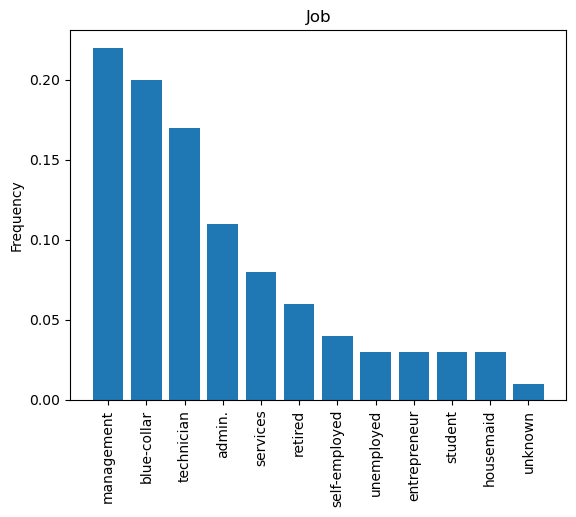

{'management': 2858, 'blue-collar': 2571, 'technician': 2141, 'admin.': 1464, 'services': 1043, 'retired': 770, 'self-employed': 454, 'unemployed': 414, 'entrepreneur': 383, 'student': 358, 'housemaid': 334, 'unknown': 80}


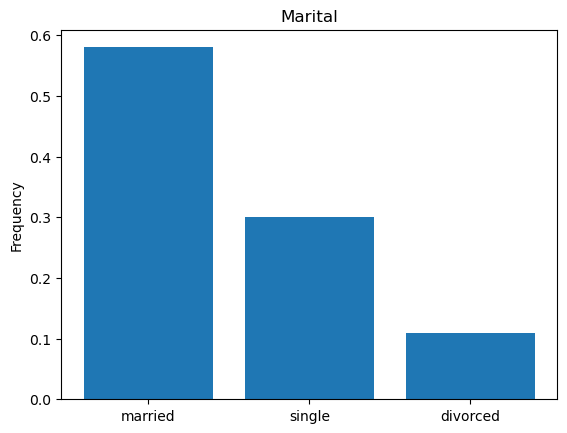

{'married': 7490, 'single': 3905, 'divorced': 1475}


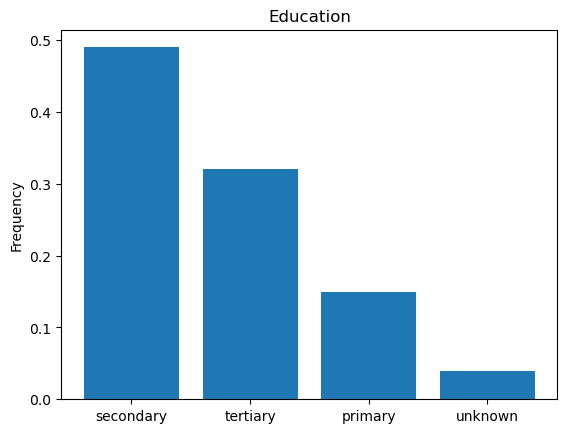

{'secondary': 6368, 'tertiary': 4075, 'primary': 1880, 'unknown': 547}


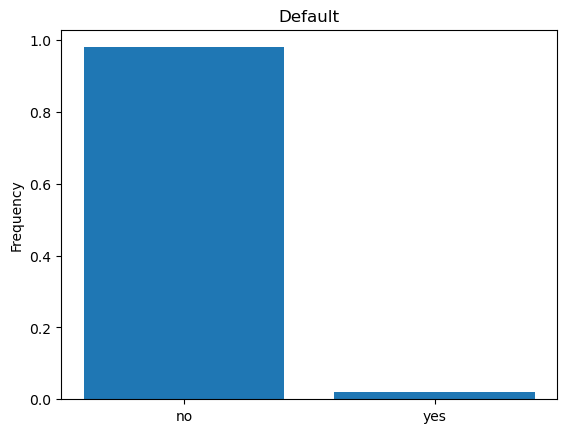

{'no': 12662, 'yes': 208}


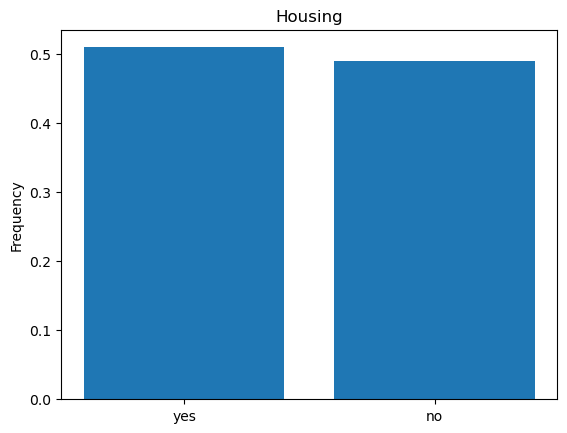

{'yes': 6605, 'no': 6265}


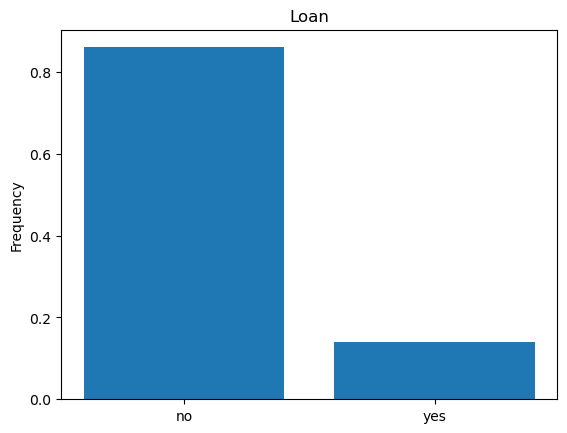

{'no': 11060, 'yes': 1810}


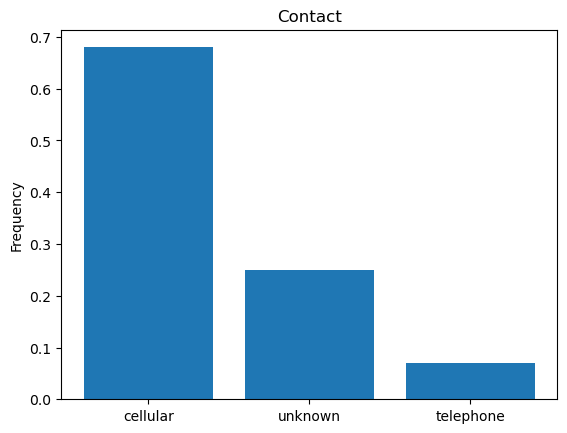

{'cellular': 8756, 'unknown': 3239, 'telephone': 875}


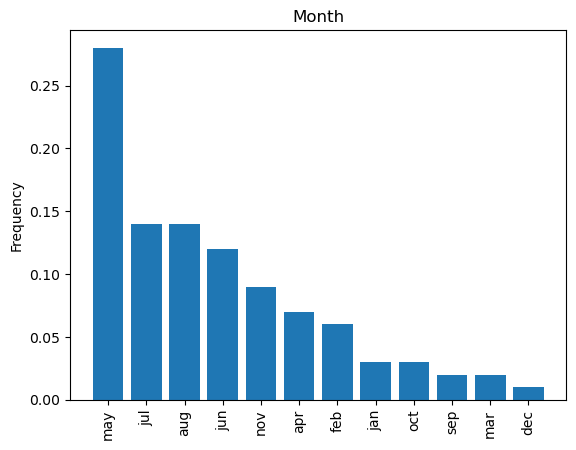

{'may': 3594, 'jul': 1823, 'aug': 1811, 'jun': 1484, 'nov': 1094, 'apr': 908, 'feb': 831, 'jan': 375, 'oct': 338, 'sep': 274, 'mar': 237, 'dec': 101}


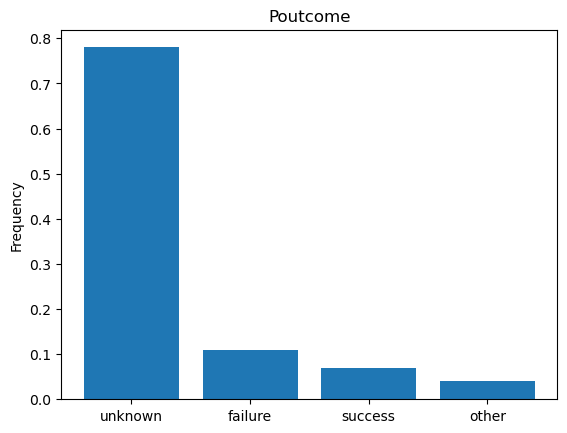

{'unknown': 10070, 'failure': 1380, 'success': 845, 'other': 575}


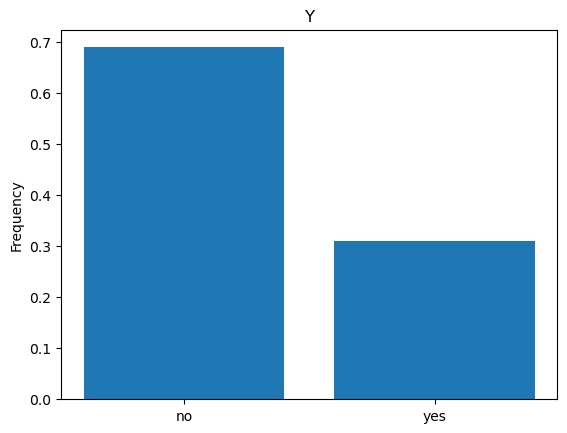

{'no': 8903, 'yes': 3967}


In [55]:
''' Helper function:
    Takes a list and returns the distribution in percent '''
def listPercentage(inp):
    total = sum(inp)
    lst = []
    for elm in inp:
        value = elm / total
        value = round(value, 2)
        lst.append(value)
    return lst

''' Creates a barplot of a dictionary'''
def dictplot(inp, title):
    names = list(inp.keys())
    values = list(inp.values())
    values = listPercentage(values)

    fig, ax = plt.subplots()
    ax.set_ylabel('Frequency')
    if len(names) > 4:
        plt.xticks(rotation = 90)
    ax.set_title(title.capitalize())
    
    plt.bar(range(len(data)), values, tick_label=names)
    plt.show()

for col in train.select_dtypes(object):
    target = train[col]
    data = dict(target.value_counts())
    dictplot(data, str(col))
    print(data)

In [56]:
train['yBinary'] = np.nan
train.loc[train['y'] == 'no', 'target'] = 0
train.loc[train['y'] == 'yes', 'target'] = 1
train.drop(['y'], axis = 1, inplace = True)
print('Mean Target is ', train['target'].mean())

Mean Target is  0.30823620823620823


In [61]:
x_train, x_test, y_train, y_test = train_test_split(train, train['target'], test_size = 0.2, random_state = 1)

##### Baseline #####

In [65]:
x1_train = copy.deepcopy(x_train)
x1_test = copy.deepcopy(x_test)

In [66]:
x1_train = pd.get_dummies(x1_train)
x1_test = pd.get_dummies(x1_test)